Practica 7.a

In [13]:
#bibliotecas de funciones
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#Modelos 
from sklearn import tree
from sklearn import svm
#Sistemas de entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
#etc
import itertools
 

In [14]:
ds = pd.read_csv('../dataset/train.csv') #cargar dataset desde .csv

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Support Vector Machine

Confusion matrix, without normalization
[[159   3   0   0]
 [  7 135   4   0]
 [  0   3 144   1]
 [  0   0   7 137]]
Normalized confusion matrix
[[0.98 0.02 0.   0.  ]
 [0.05 0.92 0.03 0.  ]
 [0.   0.02 0.97 0.01]
 [0.   0.   0.05 0.95]]


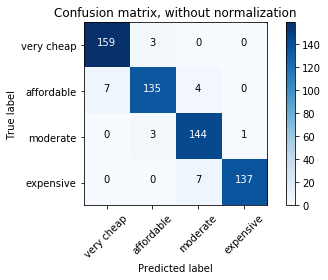

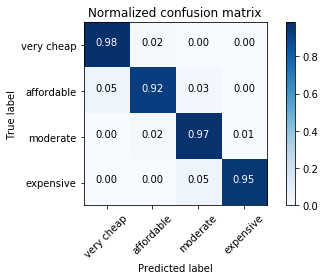

Confusion matrix, without normalization
[[156   3   0   0]
 [  1 143   4   0]
 [  0   1 136   5]
 [  0   0   5 146]]
Normalized confusion matrix
[[0.98 0.02 0.   0.  ]
 [0.01 0.97 0.03 0.  ]
 [0.   0.01 0.96 0.04]
 [0.   0.   0.03 0.97]]


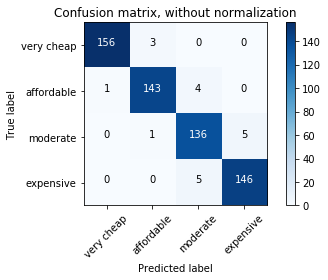

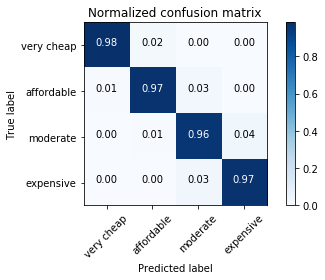

Confusion matrix, without normalization
[[172   1   0   0]
 [  3 142   5   0]
 [  0   3 130   4]
 [  0   0   2 138]]
Normalized confusion matrix
[[0.99 0.01 0.   0.  ]
 [0.02 0.95 0.03 0.  ]
 [0.   0.02 0.95 0.03]
 [0.   0.   0.01 0.99]]


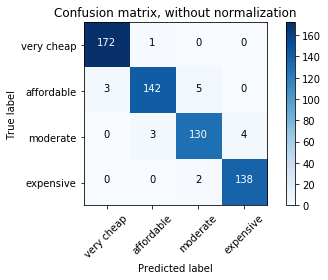

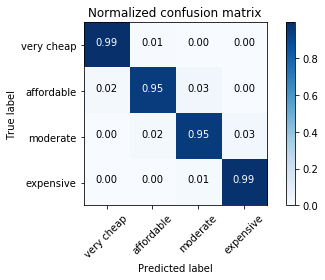

Confusion matrix, without normalization
[[142   2   0   0]
 [  0 140   3   0]
 [  0   2 149   5]
 [  0   0   7 150]]
Normalized confusion matrix
[[0.99 0.01 0.   0.  ]
 [0.   0.98 0.02 0.  ]
 [0.   0.01 0.96 0.03]
 [0.   0.   0.04 0.96]]


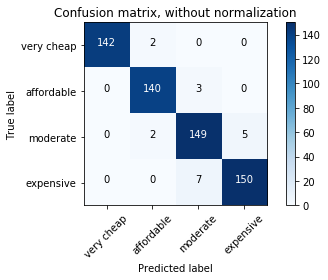

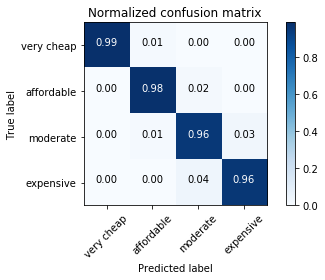

Confusion matrix, without normalization
[[148   6   0   0]
 [  2 146   4   0]
 [  0   3 139   2]
 [  0   0   4 146]]
Normalized confusion matrix
[[0.96 0.04 0.   0.  ]
 [0.01 0.96 0.03 0.  ]
 [0.   0.02 0.97 0.01]
 [0.   0.   0.03 0.97]]


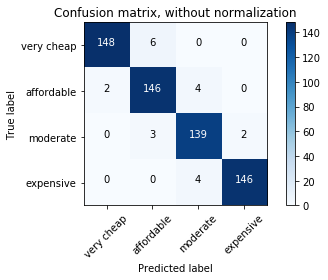

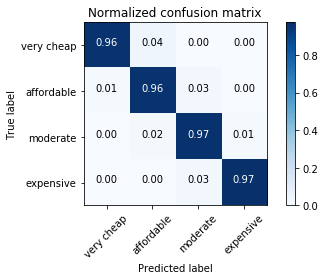

Confusion matrix, without normalization
[[139   2   0   0]
 [  1 160   0   0]
 [  0   4 135   1]
 [  0   0   6 152]]
Normalized confusion matrix
[[0.99 0.01 0.   0.  ]
 [0.01 0.99 0.   0.  ]
 [0.   0.03 0.96 0.01]
 [0.   0.   0.04 0.96]]


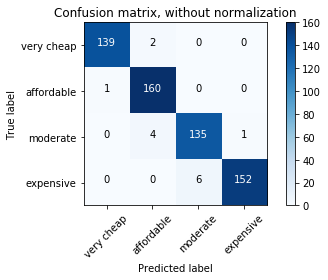

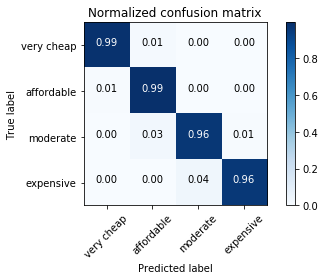

Confusion matrix, without normalization
[[160   3   0   0]
 [  2 137   7   0]
 [  0   2 142   6]
 [  0   0   4 137]]
Normalized confusion matrix
[[0.98 0.02 0.   0.  ]
 [0.01 0.94 0.05 0.  ]
 [0.   0.01 0.95 0.04]
 [0.   0.   0.03 0.97]]


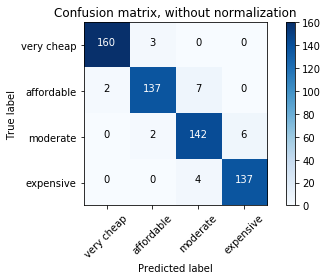

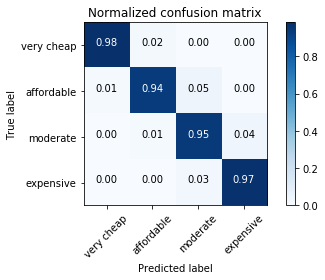

Confusion matrix, without normalization
[[139   3   0   0]
 [  0 150   2   0]
 [  0   8 147   2]
 [  0   0   5 144]]
Normalized confusion matrix
[[0.98 0.02 0.   0.  ]
 [0.   0.99 0.01 0.  ]
 [0.   0.05 0.94 0.01]
 [0.   0.   0.03 0.97]]


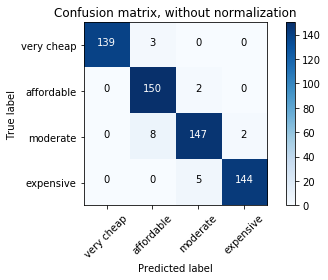

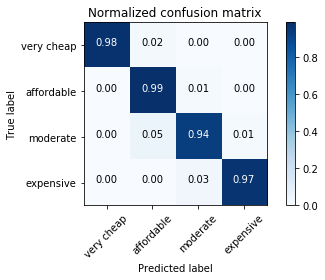

Confusion matrix, without normalization
[[151   3   0   0]
 [  5 125   1   0]
 [  0   9 139   4]
 [  0   0   3 160]]
Normalized confusion matrix
[[0.98 0.02 0.   0.  ]
 [0.04 0.95 0.01 0.  ]
 [0.   0.06 0.91 0.03]
 [0.   0.   0.02 0.98]]


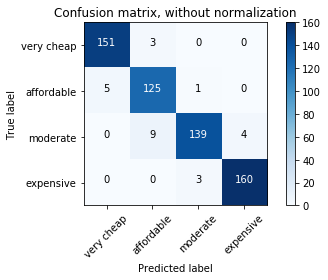

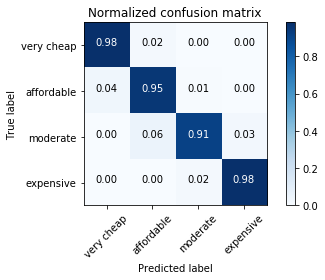

Best C : 6 with an accuracy of 0.9766666666666667


In [6]:

y = ds['price_range'] #target
X = ds.drop(columns=['price_range']) #eliminar columna

best_c = 0
ba = 0

for i in range(1,10,1):
    clf = svm.SVC(C = i,gamma = 0.01, kernel='linear')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


    clf.fit(X_train,y_train);
    y_pred = clf.predict(X_test)


    cnf_matrix = confusion_matrix(y_test, y_pred)
    class_names = ['very cheap','affordable','moderate','expensive']
    np.set_printoptions(precision=2)

     #Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                         title='Confusion matrix, without normalization')

     #Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                        title='Normalized confusion matrix')
    plt.show()
    
    n = accuracy_score(y_test, y_pred)
    if (n > ba):
        best_c = i
        ba = accuracy_score(y_test,y_pred)
        

print("Best C : {} with an accuracy of {}".format(best_c,ba))
#clf.fit(X_train, y_train)  
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)

Decision Tree 

In [16]:

dst = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


dst = dst.fit(X_train,y_train)
dst.predict(X_test)

array([1, 0, 2, 3, 3, 0, 0, 2, 3, 0, 0, 1, 2, 0, 2, 0, 3, 0, 1, 1, 0, 2,
       0, 2, 2, 3, 2, 2, 3, 1, 0, 2, 3, 0, 0, 0, 2, 1, 0, 1, 3, 1, 1, 1,
       0, 2, 2, 2, 0, 1, 0, 3, 0, 0, 1, 3, 3, 3, 1, 3, 2, 0, 0, 3, 0, 3,
       3, 2, 1, 2, 0, 1, 3, 2, 2, 0, 1, 2, 1, 3, 1, 2, 1, 0, 2, 1, 0, 3,
       2, 3, 2, 1, 1, 3, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 3, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 1, 2, 3, 0, 3, 0, 2, 2, 3, 2, 1, 3, 0, 0,
       0, 3, 2, 2, 3, 1, 3, 3, 1, 0, 0, 2, 1, 3, 2, 0, 0, 3, 1, 2, 3, 0,
       1, 0, 1, 2, 3, 3, 0, 3, 1, 3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 3, 0,
       0, 3, 1, 2, 0, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 2, 0, 2, 0, 1,
       1, 0, 2, 1, 2, 3, 3, 3, 1, 2, 3, 2, 0, 0, 0, 1, 0, 0, 3, 1, 2, 2,
       0, 3, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 3, 2, 2, 3, 1, 1,
       2, 3, 2, 1, 1, 2, 2, 0, 3, 1, 3, 0, 2, 0, 0, 0, 3, 1, 1, 1, 2, 2,
       1, 0, 2, 3, 2, 3, 0, 2, 3, 2, 1, 2, 2, 0, 2, 2, 1, 3, 2, 3, 1, 3,
       1, 3, 0, 0, 0, 2, 2, 1, 2, 3, 1, 3, 2, 2, 3,